In [ ]:
pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [ ]:
df = pd.read_csv('stroke_dataset_2023.csv')

In [ ]:
print("Number of rows: ", len(df))

Number of rows:  5169


In [ ]:
df.head()

,Unnamed: 0,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,57.0,0,0,82.54,33.4,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0.479829
1,1,70.0,1,0,72.06,28.5,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0.781443
2,3,56.0,0,0,69.24,41.4,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0.635253
3,4,32.0,0,0,111.15,30.1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0.120914
4,5,48.0,0,0,59.20,32.5,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0.380654


In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male',
       'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'stroke'],
      dtype='object')

In [ ]:
# dropping unnamed column
df.drop('Unnamed: 0',axis=1,inplace = True)

In [ ]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,57.0,0,0,82.54,33.4,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0.479829
1,70.0,1,0,72.06,28.5,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0.781443
2,56.0,0,0,69.24,41.4,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0.635253
3,32.0,0,0,111.15,30.1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0.120914
4,48.0,0,0,59.20,32.5,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0.380654


In [ ]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
stroke                            0
dtype: int64

In [ ]:
df[df.duplicated()]

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke


In [ ]:
print(f"People with minimum age {df['age'].min()}")
print(f"People with Maximum age {df['age'].max()}")

People with minimum age 30.0
People with Maximum age 82.0


<Axes: xlabel='age', ylabel='Density'>

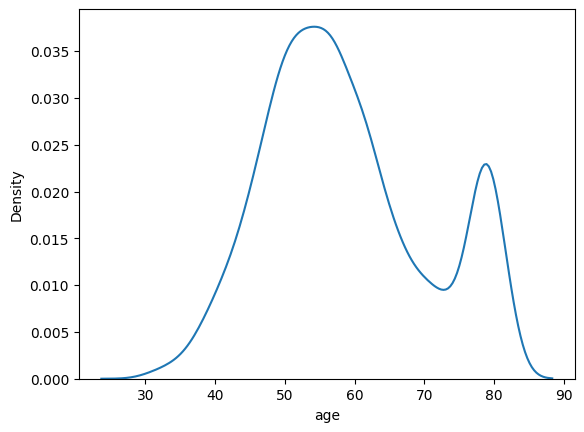

In [ ]:
sns.kdeplot(df['age'])

<Axes: >

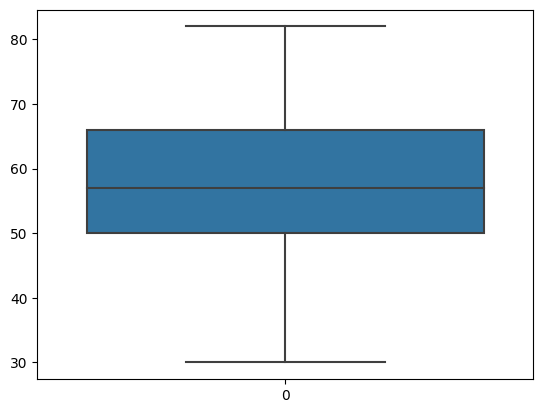

In [ ]:
sns.boxplot(df['age'])

In [ ]:
df['hypertension'].value_counts()

0    4671
1     498
Name: hypertension, dtype: int64

In [ ]:
df['hypertension'].unique()

array([0, 1])

<Axes: xlabel='hypertension', ylabel='count'>

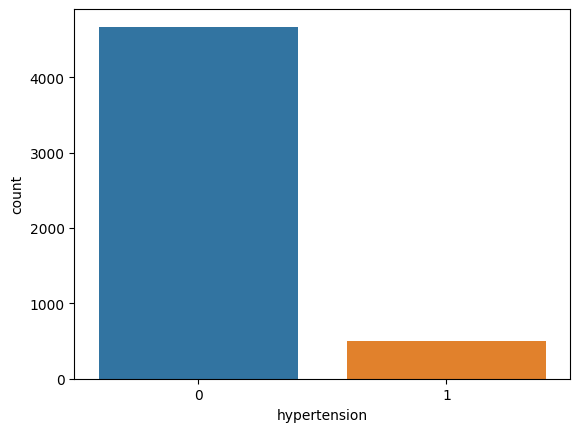

In [ ]:
sns.countplot(x='hypertension', data=df, order=df['hypertension'].unique())

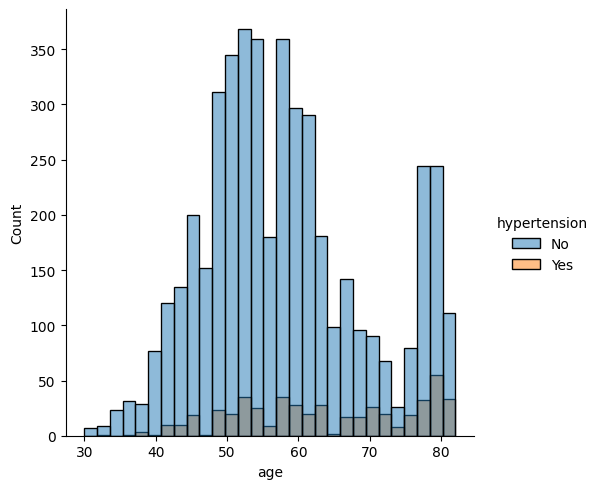

In [ ]:
sns.displot(x= df['age'],hue = df['hypertension'].map({0:'No',1:'Yes'}))

In [ ]:
def counts(feature):
    print(df[feature].value_counts())
    print("--------------------------------------------------------------------------------------")
    sns.countplot(x=feature,data = df,order = df[feature].unique())

0    4953
1     216
Name: heart_disease, dtype: int64
--------------------------------------------------------------------------------------


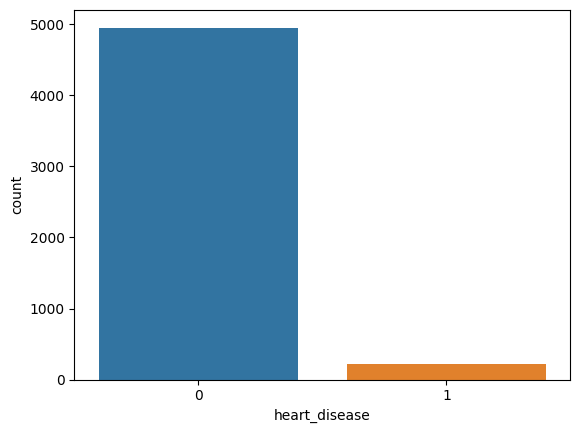

In [ ]:
counts('heart_disease')

In [ ]:
print(f"The minimum average glucose level {df['avg_glucose_level'].min()}")
print(f"The maximum average glucose level {df['avg_glucose_level'].max()}")

The minimum average glucose level 55.26
The maximum average glucose level 267.6


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

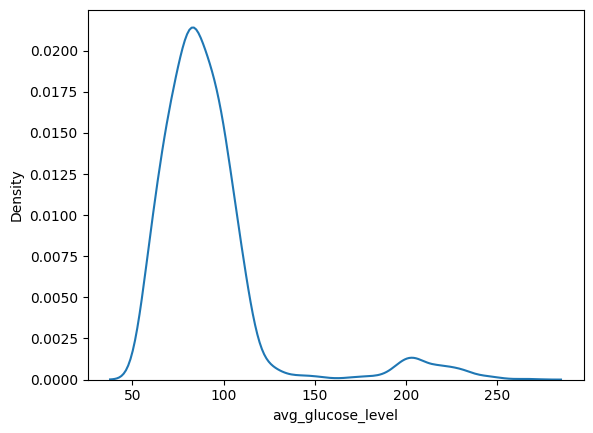

In [ ]:
sns.kdeplot(df['avg_glucose_level'])

<Axes: >

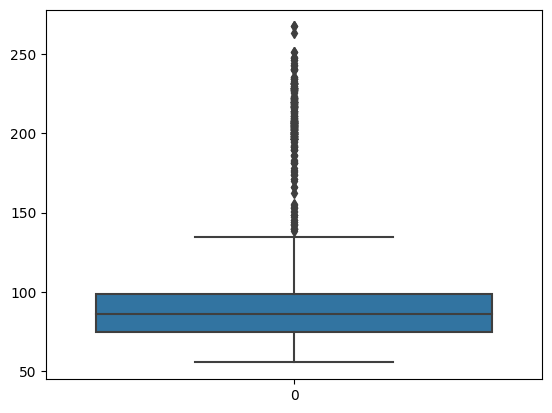

In [ ]:
sns.boxplot(df['avg_glucose_level'])

In [ ]:
print(f"The minimum average glucose level {df['bmi'].min()}")
print(f"The maximum average glucose level {df['bmi'].max()}")

The minimum average glucose level 11.5
The maximum average glucose level 60.9


In [ ]:
pd.concat([df['gender_Female'],df['gender_Male'],df['gender_Other']],axis=1).head(20)

,gender_Female,gender_Male,gender_Other
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,0,1,0
9,0,1,0


In [ ]:
print(f"{df['gender_Female'].value_counts()}")
print("-------------------------------------")
print(f"{df['gender_Male'].value_counts()}")

1    3154
0    2015
Name: gender_Female, dtype: int64
-------------------------------------
0    3155
1    2014
Name: gender_Male, dtype: int64


In [ ]:
df[df['gender_Male'] == 1].head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
1,70.0,1,0,72.06,28.5,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0.781443
3,32.0,0,0,111.15,30.1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0.120914
8,64.0,0,0,206.66,44.8,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0.898564
9,42.0,1,0,82.18,42.2,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0.219274
10,45.0,1,0,83.15,34.4,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0.230905


In [ ]:
df[df['gender_Other'] == 1].index[0]

2331

In [ ]:
df.loc[df['gender_Other'] == 1, 'gender_Male'] = 2

In [ ]:
df[df['gender_Male'] == 2].head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
2331,56.0,0,0,102.53,35.0,0,2,1,0,1,...,1,0,0,0,1,1,0,0,0,0.54009


In [ ]:
df.drop('gender_Female',axis=1,inplace=True)

In [ ]:
df = df.rename(columns={'gender_Male':'gender'})

In [ ]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,57.0,0,0,82.54,33.4,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0.479829
1,70.0,1,0,72.06,28.5,1,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0.781443
2,56.0,0,0,69.24,41.4,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0.635253
3,32.0,0,0,111.15,30.1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0.120914
4,48.0,0,0,59.20,32.5,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0.380654


0    3154
1    2014
2       1
Name: gender, dtype: int64
--------------------------------------------------------------------------------------


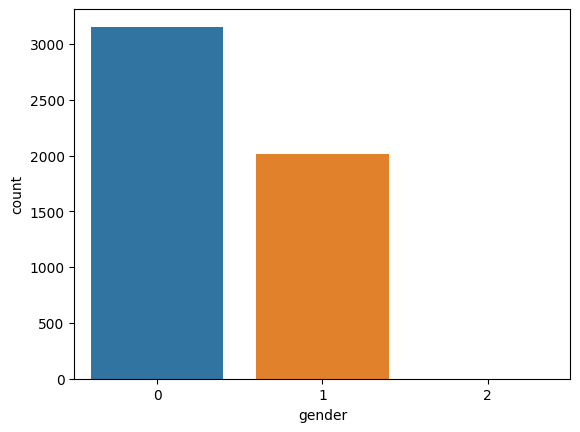

In [ ]:
counts('gender')

In [ ]:
df['gender_Other'].value_counts()

0    5168
1       1
Name: gender_Other, dtype: int64

In [ ]:
pd.concat([df['ever_married_No'],df['ever_married_Yes']],axis = 1)

,ever_married_No,ever_married_Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
5164,0,1
5165,0,1
5166,0,1
5167,0,1


1    4920
0     249
Name: ever_married_Yes, dtype: int64
--------------------------------------------------------------------------------------


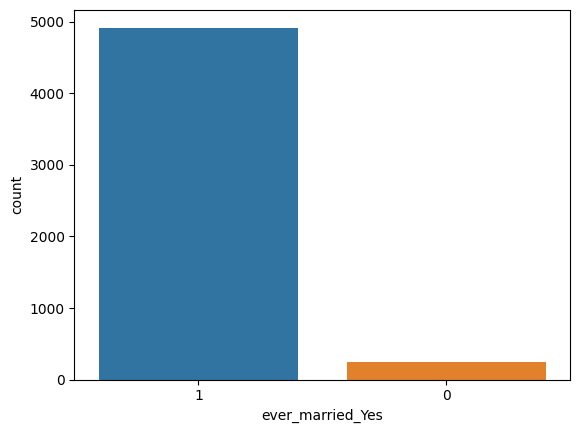

In [ ]:
counts('ever_married_Yes')

In [ ]:
df.drop('ever_married_No',axis=1,inplace=True)

In [ ]:
list(df.columns[df.columns.str.startswith('work')])

['work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children']

In [ ]:
for feature in list(df.columns[df.columns.str.startswith('work')]):
    print(f"{feature} = {df[feature].value_counts()}")
    print("-----------------------------------------------------")

work_type_Govt_job = 0    4469
1     700
Name: work_type_Govt_job, dtype: int64
-----------------------------------------------------
work_type_Never_worked = 0    5169
Name: work_type_Never_worked, dtype: int64
-----------------------------------------------------
work_type_Private = 1    3349
0    1820
Name: work_type_Private, dtype: int64
-----------------------------------------------------
work_type_Self-employed = 0    4049
1    1120
Name: work_type_Self-employed, dtype: int64
-----------------------------------------------------
work_type_children = 0    5169
Name: work_type_children, dtype: int64
-----------------------------------------------------


In [ ]:
df[df['work_type_Govt_job'] == 0][df['work_type_Private'] == 1].head(5)

<ipython-input-45-8d22fc7a6526>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['work_type_Govt_job'] == 0][df['work_type_Private'] == 1].head(5)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,57.0,0,0,82.54,33.4,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0.479829
1,70.0,1,0,72.06,28.5,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0.781443
3,32.0,0,0,111.15,30.1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0.120914
4,48.0,0,0,59.20,32.5,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0.380654
6,54.0,0,0,79.26,25.0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0.420756


In [ ]:
df[df['work_type_Govt_job'] == 1][df['work_type_Private'] == 0].head(5)

<ipython-input-46-1d115d36fa3d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['work_type_Govt_job'] == 1][df['work_type_Private'] == 0].head(5)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
2,56.0,0,0,69.24,41.4,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0.635253
5,52.0,0,1,103.12,31.6,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0.485812
8,64.0,0,0,206.66,44.8,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0.898564
17,48.0,0,0,76.92,19.2,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0.125626
26,58.0,0,0,97.39,38.0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0.527590


In [ ]:
df[df['work_type_Govt_job'] == 0][df['work_type_Private'] == 0].head(5)

<ipython-input-47-1bc798997ecf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['work_type_Govt_job'] == 0][df['work_type_Private'] == 0].head(5)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
14,61.0,0,0,95.47,32.3,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0.503522
20,79.0,0,0,59.61,30.8,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0.788041
21,57.0,0,0,95.93,21.5,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0.339390
24,80.0,0,0,90.34,24.2,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0.854610
25,78.0,0,0,206.62,33.8,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0.974666


In [ ]:
df[df['work_type_Govt_job'] == 1][df['work_type_Private'] == 1].head(5)

<ipython-input-48-f162fc3b31f8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['work_type_Govt_job'] == 1][df['work_type_Private'] == 1].head(5)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke


In [ ]:
df.loc[df['work_type_Govt_job'] == 0,'work_type_Private']

0       1
1       1
3       1
4       1
6       1
       ..
5164    1
5165    1
5166    0
5167    1
5168    1
Name: work_type_Private, Length: 4469, dtype: int64

In [ ]:
idx = df.loc[(df['work_type_Govt_job'] == 0) & (df['work_type_Private'] == 0)].index

In [ ]:
idx

Int64Index([  14,   20,   21,   24,   25,   29,   31,   38,   49,   60,
            ...
            5129, 5137, 5138, 5142, 5143, 5145, 5154, 5158, 5159, 5166],
           dtype='int64', length=1120)

In [ ]:
df.loc[df['work_type_Self-employed'] == 1, 'work_type_Govt_job'] = 2

In [ ]:
df['work_type_Govt_job'].value_counts()

0    3349
2    1120
1     700
Name: work_type_Govt_job, dtype: int64

In [ ]:
df[df['work_type_Govt_job'] == 2].index == idx

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
df.rename(columns={'work_type_Govt_job':'work_type'},inplace=True)

0    3349
2    1120
1     700
Name: work_type, dtype: int64
--------------------------------------------------------------------------------------


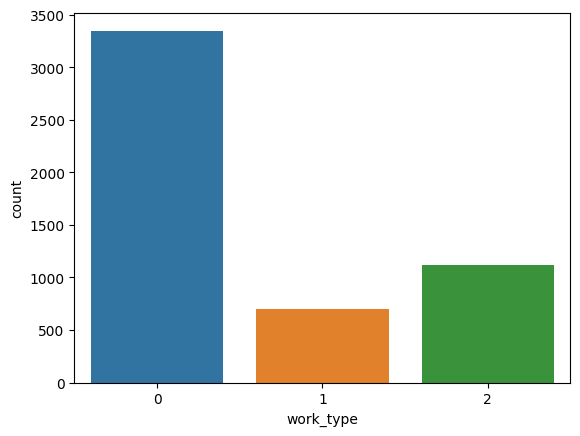

In [ ]:
counts('work_type')

In [ ]:
df.drop(['work_type_Never_worked','work_type_children'],axis=1,inplace=True)

In [ ]:
df.drop('Residence_type_Urban',axis=1,inplace=True)
df.rename(columns={'Residence_type_Rural':'residence_type'},inplace=True)

0    2627
1    2542
Name: residence_type, dtype: int64
--------------------------------------------------------------------------------------


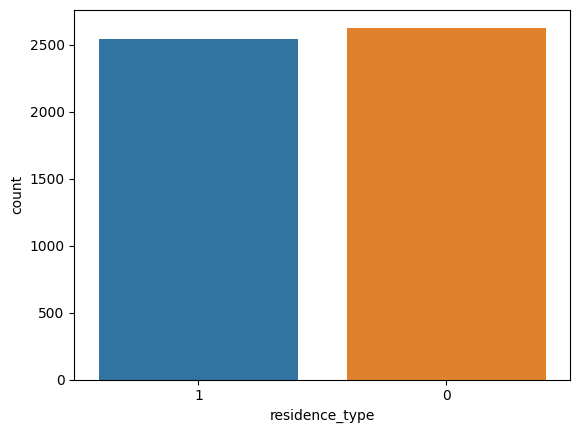

In [ ]:
counts('residence_type')

In [ ]:
for feature in df.columns[df.columns.str.startswith('smoking')]:
    print(f" {df[feature].value_counts()} ")
    print("-------------------------------------------")

 0    4241
1     928
Name: smoking_status_Unknown, dtype: int64 
-------------------------------------------
 0    3979
1    1190
Name: smoking_status_formerly smoked, dtype: int64 
-------------------------------------------
 0    2958
1    2211
Name: smoking_status_never smoked, dtype: int64 
-------------------------------------------
 0    4329
1     840
Name: smoking_status_smokes, dtype: int64 
-------------------------------------------


In [ ]:
df[df['smoking_status_smokes'] == 1].head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,gender_Other,ever_married_Yes,work_type,work_type_Private,work_type_Self-employed,residence_type,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
2,56.0,0,0,69.24,41.4,0,0,1,1,0,0,0,0,0,0,1,0.635253
3,32.0,0,0,111.15,30.1,1,0,1,0,1,0,1,0,0,0,1,0.120914
7,45.0,0,0,106.83,32.5,0,0,1,0,1,0,0,0,0,0,1,0.263285
10,45.0,1,0,83.15,34.4,1,0,1,0,1,0,1,0,0,0,1,0.230905
11,53.0,0,0,86.00,27.6,0,0,1,0,1,0,1,0,0,0,1,0.443184


In [ ]:
df[df['smoking_status_Unknown'] == 1]

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,gender_Other,ever_married_Yes,work_type,work_type_Private,work_type_Self-employed,residence_type,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,57.0,0,0,82.54,33.4,0,0,1,0,1,0,1,1,0,0,0,0.479829
1,70.0,1,0,72.06,28.5,1,0,1,0,1,0,0,1,0,0,0,0.781443
15,45.0,0,0,73.87,45.5,0,0,1,0,1,0,0,1,0,0,0,0.281115
26,58.0,0,0,97.39,38.0,0,0,1,1,0,0,0,1,0,0,0,0.527590
28,55.0,0,0,76.47,28.9,0,0,1,0,1,0,1,1,0,0,0,0.489504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,39.0,0,0,83.41,42.8,1,0,1,0,1,0,0,1,0,0,0,0.127540
5154,78.0,0,0,93.85,29.6,1,0,1,2,0,1,0,1,0,0,0,0.804452
5158,45.0,0,0,96.83,40.5,0,0,1,2,0,1,1,1,0,0,0,0.154483
5165,57.0,0,0,77.93,35.7,0,0,1,0,1,0,0,1,0,0,0,0.491382


In [ ]:
# 0 - No , 1 -yes {0:known,1:unknown}
smoke_df =  pd.DataFrame(df.loc[df['smoking_status_Unknown'] == 0,['smoking_status_Unknown','smoking_status_formerly smoked',
    'smoking_status_never smoked', 'smoking_status_smokes']])

In [ ]:
smoke_df.head(50)

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,0,0,1,0
9,0,0,1,0
10,0,0,0,1
11,0,0,0,1


In [ ]:
df.rename(columns={'smoking_status_formerly smoked':'smoking_status_formerly_smoked'},inplace=True)
df.rename(columns={'smoking_status_never smoked':'smoking_status_never_smoked'},inplace=True)


0    4241
1     928
Name: smoking_status_Unknown, dtype: int64
--------------------------------------------------------------------------------------


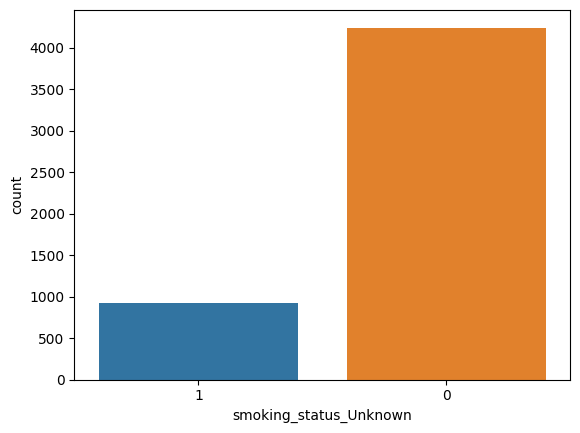

In [ ]:
counts('smoking_status_Unknown')

In [ ]:
np.round(df['stroke'])

0       0.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
5164    1.0
5165    0.0
5166    0.0
5167    0.0
5168    0.0
Name: stroke, Length: 5169, dtype: float64

In [ ]:
df['stroke'] = np.round(df['stroke'])

In [ ]:
df['stroke'].value_counts()

1.0    2714
0.0    2455
Name: stroke, dtype: int64

In [ ]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,gender_Other,ever_married_Yes,work_type,work_type_Private,work_type_Self-employed,residence_type,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,stroke
0,57.0,0,0,82.54,33.4,0,0,1,0,1,0,1,1,0,0,0,0.0
1,70.0,1,0,72.06,28.5,1,0,1,0,1,0,0,1,0,0,0,1.0
2,56.0,0,0,69.24,41.4,0,0,1,1,0,0,0,0,0,0,1,1.0
3,32.0,0,0,111.15,30.1,1,0,1,0,1,0,1,0,0,0,1,0.0
4,48.0,0,0,59.20,32.5,0,0,1,0,1,0,0,0,0,1,0,0.0


<Axes: >

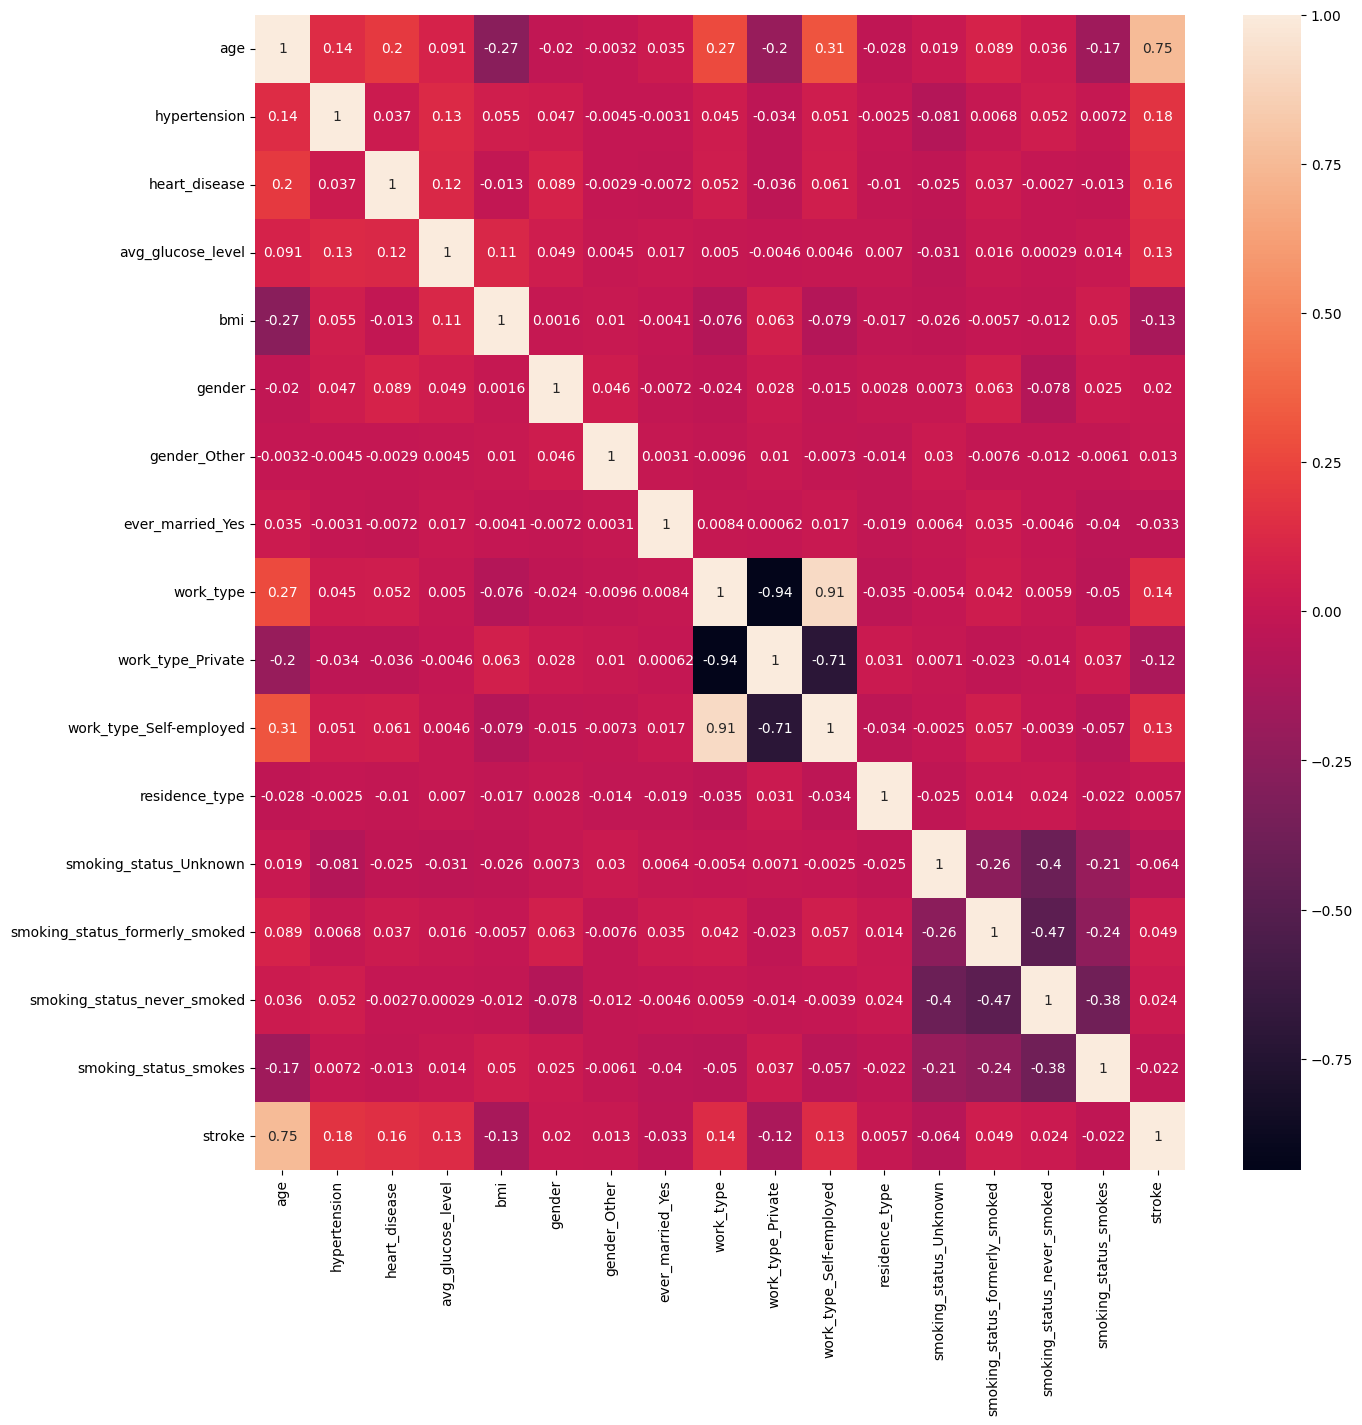

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

<Axes: xlabel='hypertension', ylabel='age'>

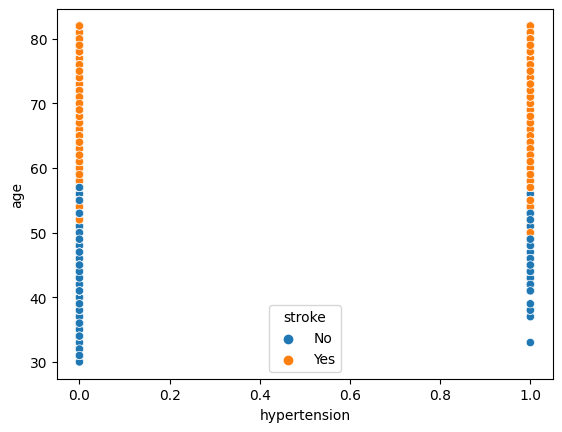

In [ ]:
sns.scatterplot(y=df['age'], x=df['hypertension'], hue=df['stroke'].map({0: 'No', 1: 'Yes'}))


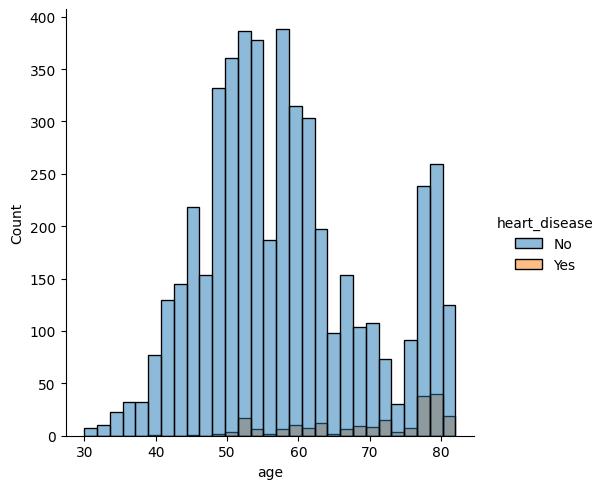

In [ ]:
sns.displot(x= df['age'],hue = df['heart_disease'].map({0:'No',1:'Yes'}))

<Axes: xlabel='heart_disease', ylabel='age'>

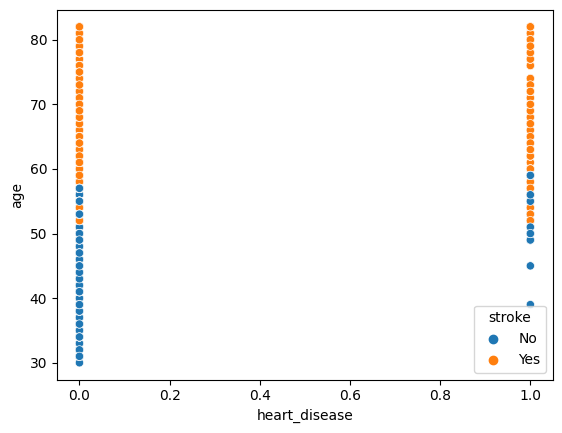

In [ ]:
sns.scatterplot(y=df['age'], x=df['heart_disease'], hue=df['stroke'].map({0: 'No', 1: 'Yes'}))

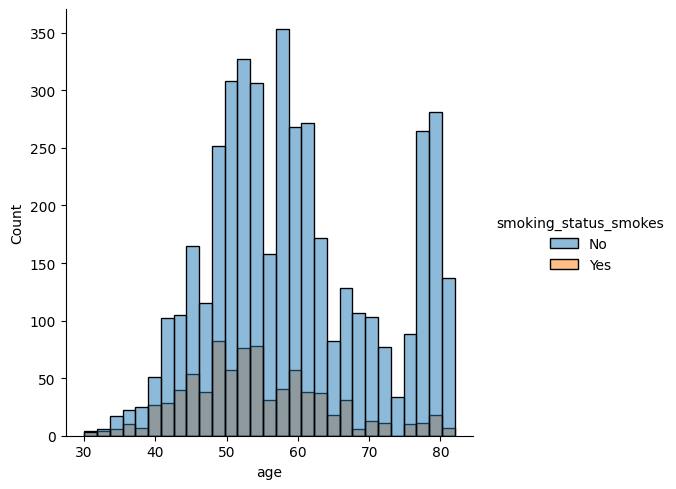

In [ ]:
sns.displot(x= df['age'],hue = df['smoking_status_smokes'].map({0:'No',1:'Yes'}))

<Axes: xlabel='age', ylabel='bmi'>

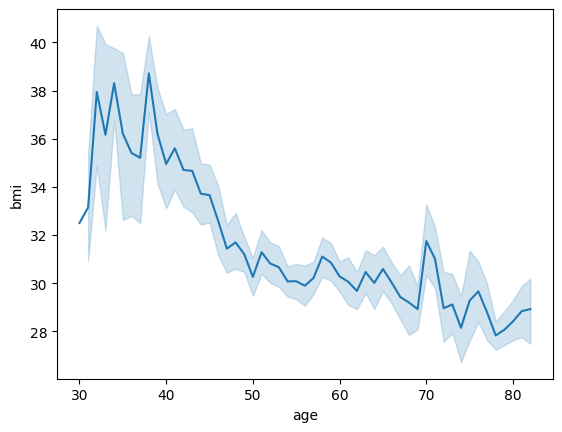

In [ ]:
sns.lineplot(x= df['age'],y = df['bmi'])

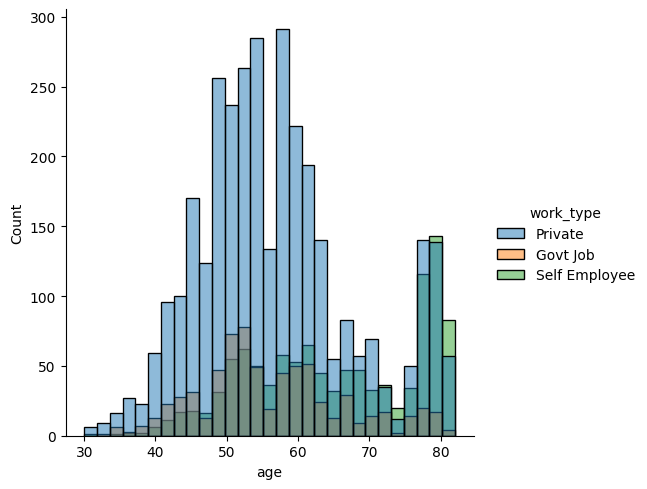

In [ ]:
sns.displot(x= df['age'],hue = df['work_type'].map({0:'Private',1:'Govt Job',2:'Self Employee'}))

<Axes: xlabel='work_type', ylabel='age'>

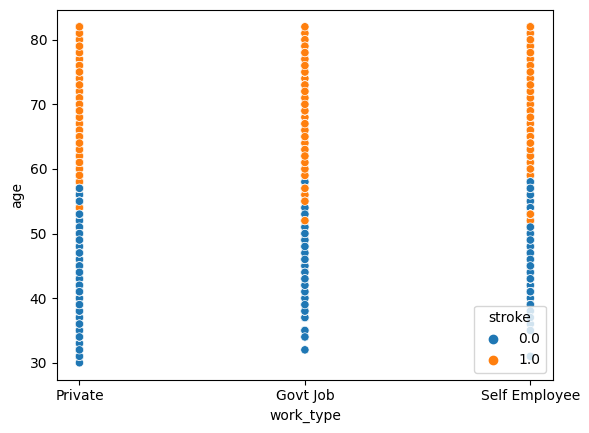

In [ ]:
sns.scatterplot(y= df['age'],x  = df['work_type'].map({0:'Private',1:'Govt Job',2:'Self Employee'}),hue = df['stroke'])

<Axes: xlabel='avg_glucose_level', ylabel='hypertension'>

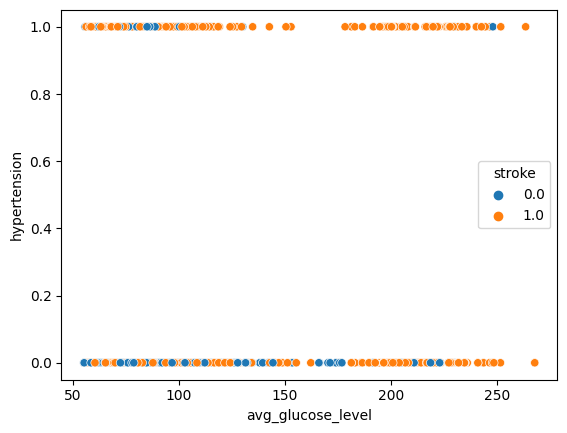

In [ ]:
sns.scatterplot(y= df['hypertension'], x = df['avg_glucose_level'],hue=df['stroke'])

In [ ]:
df[df['avg_glucose_level'] < 70]['stroke'].value_counts()

1.0    467
0.0    440
Name: stroke, dtype: int64

In [ ]:
df[df['avg_glucose_level'] < 70][['hypertension','heart_disease','stroke']].value_counts()

hypertension  heart_disease  stroke
0             0              0.0       422
                             1.0       395
1             0              1.0        46
0             1              1.0        24
1             0              0.0        15
0             1              0.0         3
1             1              1.0         2
dtype: int64

In [ ]:
df[['hypertension','heart_disease','stroke']].value_counts()

hypertension  heart_disease  stroke
0             0              0.0       2333
                             1.0       2154
1             0              1.0        365
0             1              1.0        165
1             0              0.0        101
              1              1.0         30
0             1              0.0         19
1             1              0.0          2
dtype: int64

In [ ]:
df[df['avg_glucose_level'] > 140]['stroke'].value_counts()

1.0    254
0.0     38
Name: stroke, dtype: int64

In [ ]:
df[df['avg_glucose_level'] > 140][['age', 'hypertension', 'heart_disease', 'stroke']].sort_values(ascending = True,by = 'age').value_counts().head(50)



age   hypertension  heart_disease  stroke
78.0  0             0              1.0       13
76.0  0             0              1.0       11
61.0  0             0              1.0       10
57.0  0             0              1.0       10
66.0  0             0              1.0        9
54.0  0             0              1.0        9
65.0  0             0              1.0        9
60.0  0             0              1.0        7
47.0  0             0              0.0        7
63.0  0             0              1.0        7
71.0  0             0              1.0        7
75.0  0             0              1.0        6
55.0  0             0              1.0        6
45.0  0             0              0.0        6
49.0  0             0              0.0        6
63.0  0             1              1.0        5
59.0  0             0              1.0        5
70.0  1             0              1.0        5
78.0  1             0              1.0        5
79.0  1             0              1.0        

In [ ]:
df['avg_glucose_level']

0        82.54
1        72.06
2        69.24
3       111.15
4        59.20
         ...  
5164     80.73
5165     77.93
5166     78.80
5167     72.49
5168    102.91
Name: avg_glucose_level, Length: 5169, dtype: float64

In [ ]:
x = df.drop('stroke',axis=1)
y=df['stroke']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

# **Random Forest Regression**

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
rf_preds=rf.predict(x_test).round()
rf_mse=mean_squared_error(y_test, rf_preds)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)
rf_preds = rf_clf.predict(x_test)

# **Cat Boost**

In [ ]:
catboost=CatBoostRegressor(iterations=500, depth=5, learning_rate=0.05, loss_function='RMSE', verbose=0)
catboost.fit(x_train, y_train)
catboost_preds = catboost.predict(x_test).round()
catboost_mse = mean_squared_error(y_test, catboost_preds)
catboost_clf = CatBoostClassifier(iterations=500, depth=5, learning_rate=0.05, loss_function='Logloss', verbose=0)
catboost_clf.fit(x_train, y_train)
catboost_preds = catboost_clf.predict(x_test)

# **Mean Squared Error of both models**

In [ ]:
print(f"Random Forest: {rf_mse}")
print(f"Cat Boost: {catboost_mse}")

Random Forest: 0.06382978723404255
Cat Boost: 0.04061895551257253


# **Confusion Matrix**

In [ ]:
rf_cm = confusion_matrix(y_test, rf_preds)
catboost_cm = confusion_matrix(y_test, catboost_preds)
print(f"Random Forest: {rf_cm}")
print(f"Cat Boost: {catboost_cm}")

Random Forest: [[440  31]
 [ 27 536]]
Cat Boost: [[452  19]
 [ 17 546]]


In [ ]:
metrics = {
    "Accuracy": (accuracy_score(y_test, rf_preds), accuracy_score(y_test, catboost_preds)),
    "Precision": (precision_score(y_test, rf_preds), precision_score(y_test, catboost_preds)),
    "Recall": (recall_score(y_test, rf_preds), recall_score(y_test, catboost_preds)),
    "ROC AUC": (roc_auc_score(y_test, rf_preds), roc_auc_score(y_test, catboost_preds))
}
metric_df = pd.DataFrame(metrics, columns=["Accuracy", "Precision", "Recall", "ROC AUC"], index=["Random Forest", "CatBoost"])
print(metric_df)

               Accuracy  Precision    Recall   ROC AUC
Random Forest  0.943907   0.945326  0.952043  0.943113
CatBoost       0.965184   0.966372  0.969805  0.964732


In [ ]:
if rf_mse < catboost_mse:
    print("Random Forest performed better.")
else:
    print("CatBoost performed better.")

CatBoost performed better.


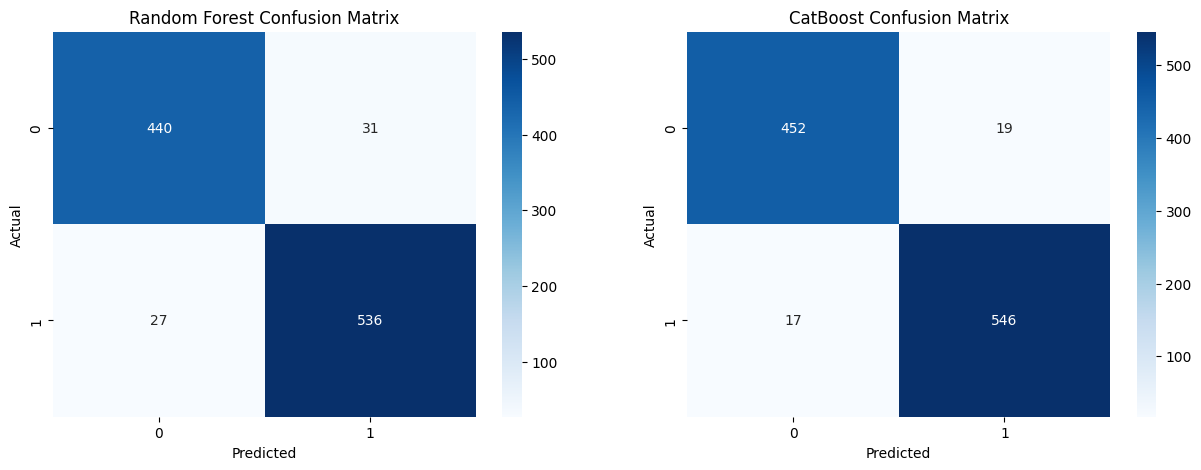

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")
ax[0].set_ylabel("Actual")
ax[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, catboost_preds), annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("CatBoost Confusion Matrix")
ax[1].set_ylabel("Actual")
ax[1].set_xlabel("Predicted")

plt.show()

In [ ]:
best_model_counts = {"Random Forest": 0, "CatBoost": 0}

for metric, values in metrics.items():
    rf_value, catboost_value = values
    if rf_value > catboost_value:
        best_model_counts["Random Forest"] += 1
    elif catboost_value > rf_value:
        best_model_counts["CatBoost"] += 1

best_model = max(best_model_counts, key=best_model_counts.get)

print(f"Based on the metrics used, the best model is: {best_model} with {best_model_counts[best_model]} higher scores out of {len(metrics)} metrics.")

Based on the metrics used, the best model is: CatBoost with 4 higher scores out of 4 metrics.
